# Принятие решений в бизнесе

**Цель проекта:** Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**План работы:**
 В соответствии с имеющимися данными, в нашем распоряжении имеются девять гипотез.
 
 На парвом этапе нам предстоит найти приоритетные гипотезы посредством применения фреймворка ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач и его модификации RICE (R от англ. reach, «охват»).
 
 На втором этапе проанализируйем A/B-тест. 
 Для этого посторим и подробно изуцучим графики кумулятивных значений  (выручки, среднего чека и заказов), найдем процентили и  посчитаем статистическую значимость. 


# Загрузка и предобработка данных

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.options.display.max_colwidth = 130

In [3]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'), # гипотезы
    pd.read_csv('/datasets/orders.csv'),  # заказы
    pd.read_csv('/datasets/visitors.csv'),  # посетители
)

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
duplicated_hypothesis = hypothesis[hypothesis.duplicated()].sum()
duplicated_hypothesis

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

In [7]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
orders = orders.rename (columns = {'visitorId':'user_id', 'transactionId':'order_id'})
orders

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  1197 non-null   int64 
 1   user_id   1197 non-null   int64 
 2   date      1197 non-null   object
 3   revenue   1197 non-null   int64 
 4   group     1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
duplicated_orders = orders[orders.duplicated()].sum()
duplicated_orders

order_id    0.0
user_id     0.0
date        0.0
revenue     0.0
group       0.0
dtype: float64

In [11]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
duplicated_visitors = visitors[visitors.duplicated()].sum()
duplicated_visitors

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [14]:
hypothesis.columns = hypothesis.columns.str.lower()

In [15]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [16]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Вывод:**

По итогам предобработки данных проведена следующая работа.

Данные датасетов загружены в датафреймы и подготовлены для дальнейшего анализа.

Данные проверены на наличию пропусков и дубликатов - пропуски и дубликаты отсутствуют.

Типы данных в столбцах, которые содержат дату и время, приведены к формату datetime.

Названия столбцов переименованы в «змеином регистре».

In [29]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [49]:
print ('Дата начала теста', orders['date'].min()) 

**Дата начала теста** 2019-08-01 00:00:00


In [38]:
print ('Дата окончания теста', orders['date'].max()) 

Дата окончания теста 2019-08-31 00:00:00


In [78]:
users_count = (orders.groupby(['group']).agg({'user_id': 'nunique'}))
users_count

,user_id
group,
A,503
B,586


In [86]:
group_a = orders[orders['group'] == 'A']['user_id']
group_b = orders[orders['group'] == 'B']['user_id']
same_ab = orders.query('user_id in @group_a and user_id in @group_b')

same_ab_count = len(same_ab.groupby(['user_id']).agg({'user_id': 'nunique'}))


58

In [89]:
users_dynamic = (visitors.groupby(['date', 'group']).agg({'visitors': 'sum'}))
users_dynamic

visitors
date       group          
2019-08-01 A           719
           B           713
2019-08-02 A           619
           B           581
2019-08-03 A           507
...                    ...
2019-08-29 B           531
2019-08-30 A           490
           B           490
2019-08-31 A           699
           B           718

[62 rows x 1 columns]

Нагляднее данную таблицу представить в види графика.

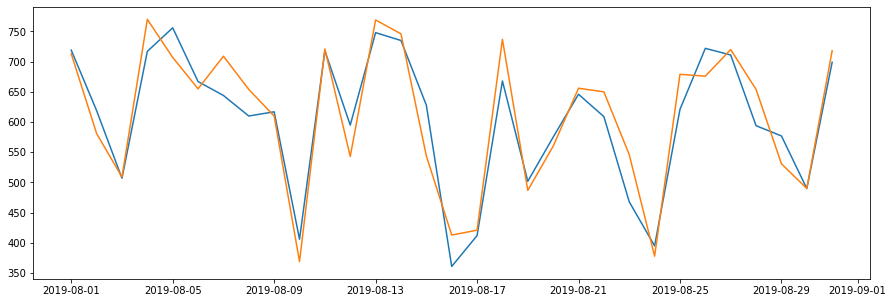

In [94]:
plt.figure(figsize=(15, 5))
a_group = visitors[visitors['group']=='A']
b_group = visitors[visitors['group']=='B']
plt.plot(a_group['date'], a_group['visitors'])
plt.plot(b_group['date'], b_group['visitors'])

Динамика посещений в обеих группах одинаковая.

# Часть 1. Приоритизация гипотез.

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [95]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [96]:
print (hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False).round(2))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Фреймворк ICE состоит из трёх компонент:
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
Efforts — сколько стоит протестировать эту гипотезу. 

Согласно методу ICE самыми перспективными гипотезами являются:

- запустить акцию, дающую скидку на товар в день рождения;   

- добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; 

- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [97]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
print (hypothesis[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Фреймворк RICE состоит из четырёх компонент:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
Efforts — сколько стоит протестировать эту гипотезу. 

Согласно методу RICE самыми перспективными гипотезами являются:

 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Приоритизация гипотез при применении RICE вместо ICE произошла за счет параметра Reach — скольких пользователей затронет изменение.

# Часть 2. Анализ A/B-теста

## График кумулятивной выручки по группам. 

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [98]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [99]:
orders

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Подсчитаем сумму средних чеков:
.agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}). Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group': 

In [100]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [101]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [102]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов:

In [103]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [105]:
cumulativeData['date'].min()

Timestamp('2019-08-31 00:00:00')

In [106]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

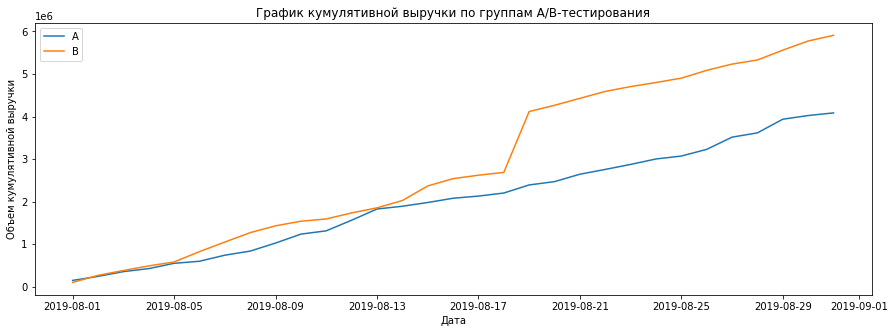

In [109]:
plt.figure(figsize=(15,5))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.legend()


plt.title("График кумулятивной выручки по группам A/B-тестирования")

plt.ylabel("Объем кумулятивной выручки")

plt.xlabel("Дата")

plt.show()

**Вывод:**

В период с 01.08.2019 по 17.08.2019 выручка у групп А и В растет примерно одинаково. После 17.08.2019 в группе B наблюдается резкий всплесках числа заказов, либо о появлении очень дорогих заказов или аномалии. 

## График кумулятивного среднего чека по группам. 

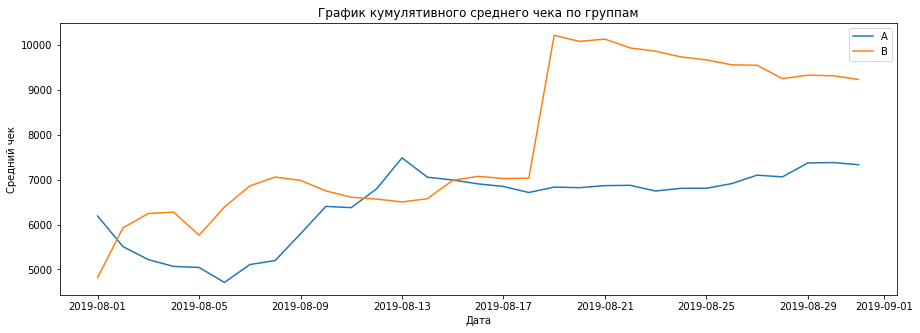

In [110]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("График кумулятивного среднего чека по группам")
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.show()

**Вывод:**

Для группы А средний чек тоже становится равномерным ближе к концу теста.
Для группы B мы опять видим всплеск после 17.08.2019 по вероятной причине попадания крупных заказов.
Нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

## График относительного изменения кумулятивного среднего чека группы B к группе A. 

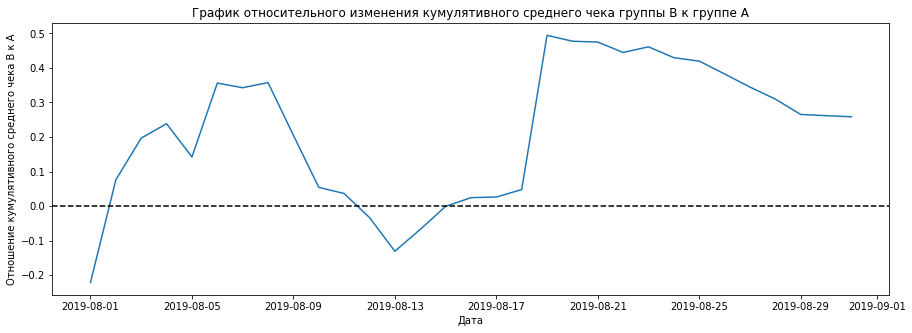

In [111]:
plt.figure(figsize=(15,5))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel("Отношение кумулятивного среднего чека В к А")
plt.xlabel("Дата")
plt.show()

**Вывод:**

На графике повторяется резкий всплеск 17.08.2019.

## График кумулятивного среднего количества заказов на посетителя по группам. 

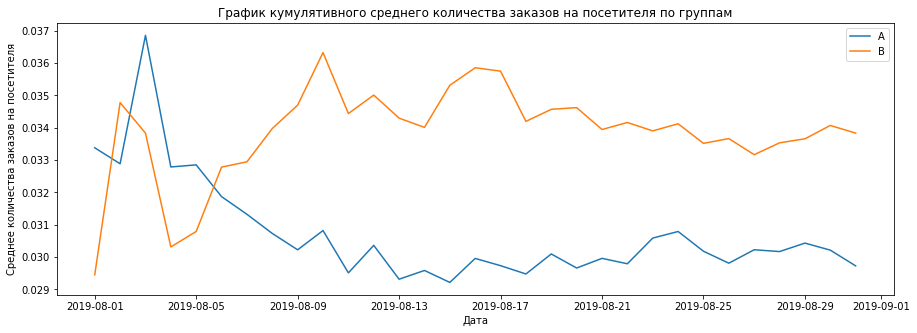

In [112]:
plt.figure(figsize=(15,5))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.ylabel("Среднее количества заказов на посетителя")
plt.xlabel("Дата")
plt.show()
# задаем масштаб осей


**Вывод:**

Изначально конверсия группы А была значительно выше конверсии группы В, но с течением времени она упала до значений около 0.029 - 0.031. Конверия группы В имеет противоположную картину. На конец наблюдаемого периода конверсия этой группы стабилизировалась на значениях 0.033-0.035

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

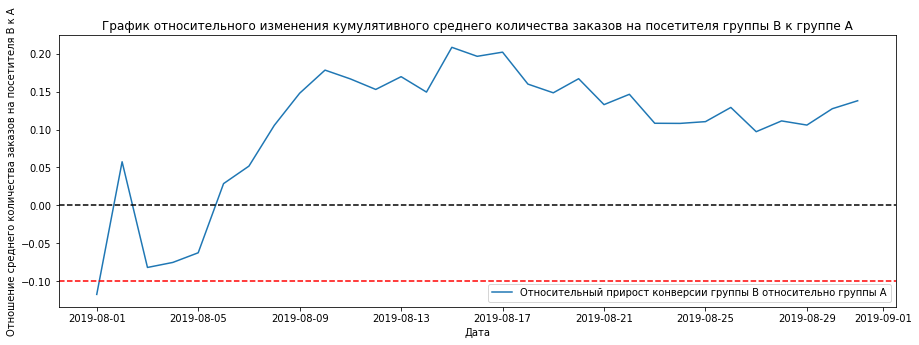

In [113]:
plt.figure(figsize=(15,5))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='red', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.ylabel("Отношение среднего количества заказов на посетителя В к А")
plt.xlabel("Дата")
plt.show()


**Вывод:**

В начале теста группа B значительно проигрывала группе A. На конец изучаемого периода конверсия группы В намного выше группы А.

## График количества заказов по пользователям. 

In [116]:
orders

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

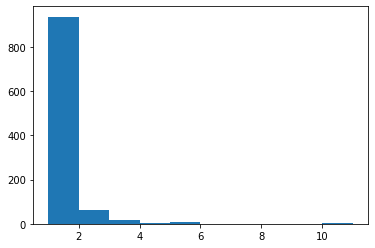

In [117]:
ordersByUsers = (
    orders.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)


plt.hist(ordersByUsers['order_id']) 

In [118]:
ordersByUsers = (
    orders.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

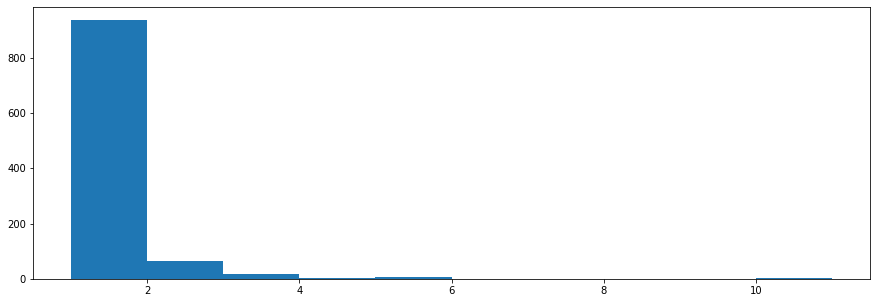

In [32]:
# Построим гистограмму распределения числа заказов по пользователям
plt.figure(figsize=(15,5))
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

plt.hist(ordersByUsers['orders']) 

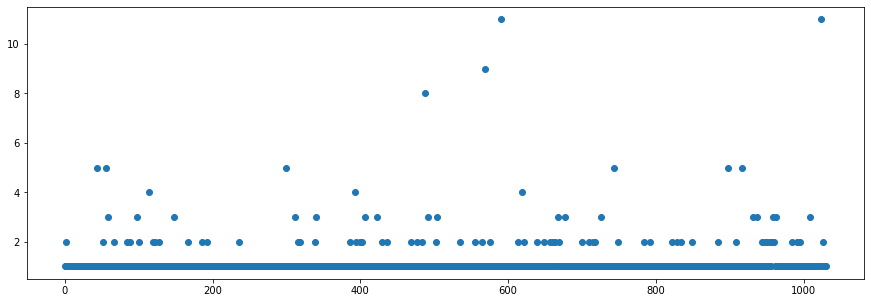

In [119]:
# Построим точечный график количества заказов по пользователям
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0, len(ordersByUsers)))


plt.scatter(x_values, ordersByUsers['orders']) 

**Вывод:**

Подавляющее большинство пользователей делают один заказ. Реже 2-3 заказа. Только 9 пользователей сделало 4 и 5 заказов. Пользователи с большим  количеством заказов являются аномальными.

## Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [120]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


 <div class="alert alert-info"> <b> </b>

**Вывод:**

Не более 5% пользователей совершили 2 заказа, не более 1% совершили 4 заказа.
Считаю целесообразным выбрать считать аномальными клиентов с 4 закзами и выше.

## Точечный график стоимостей заказов. 

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

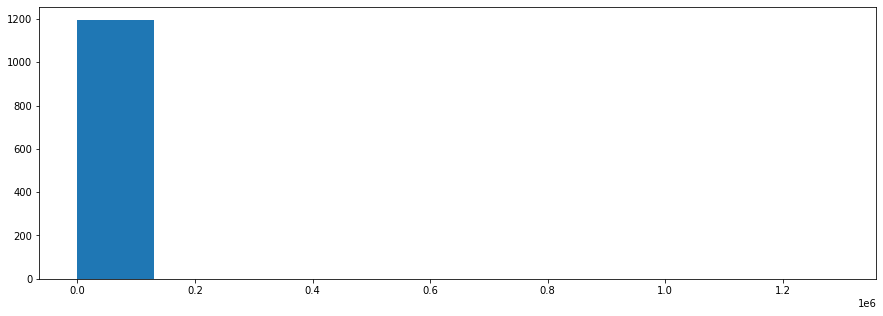

In [121]:
plt.figure(figsize=(15,5))
plt.hist(orders['revenue']) 

(0.0, 30000.0)

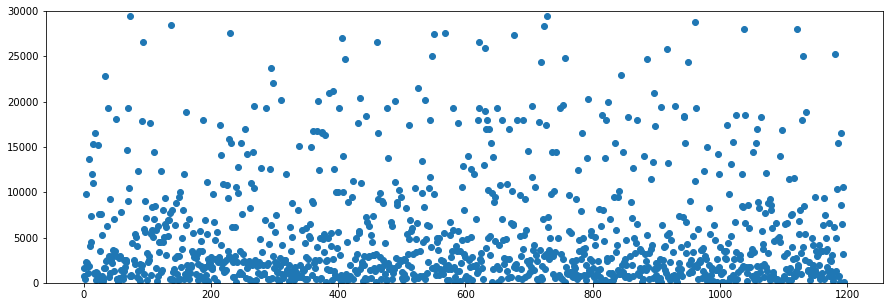

In [123]:
plt.figure(figsize=(15,5))

x_values = pd.Series(range(0, len(orders)))


plt.scatter(x_values, orders['revenue']) 

plt.ylim(0, 30000)
#plt.ylim(0, 800000)


**Вывод:**

Большая часть заказов не превышает 5000. В основном заказы не превышают 50 000. Но есть один заказ на сумму более 200 000 и один на сумму более 1 200 000 которые вероятно являются причиной резкого скачка на графиках.

## Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границу для определения аномальных заказов.

In [124]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:**

5% пользователей совершили заказ на сумму не больше 28 000.
1% пользователей совершили заказ на сумму не больше 58233.2
Заказы выше этого значения будут считаться аномальными.

## Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

 <div class="alert alert-info"> <b> </b>

Сформулируем гипотезы.
Нулевая гипотеза (H0)гласит, что различий в среднем количестве заказов между группами нет, альтернативная гипотеза (Н1) гласит, что  имеется различие в среднем чеке между группами А и В.

In [136]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)



ordersByUsersA = (

    orders[orders['group'] == 'A']

    .groupby('user_id', as_index=False)

    .agg({'order_id': pd.Series.nunique})

)

ordersByUsersA.columns = ['user_id', 'orders']



ordersByUsersB = (

    orders[orders['group'] == 'B']

    .groupby('user_id', as_index=False)

    .agg({'order_id': pd.Series.nunique})

)

ordersByUsersB.columns = ['user_id', 'orders']



sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)



sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)





In [133]:
print('P-value =',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии группы В к группе А составил - ',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value = 0.01679
Относительный прирост конверсии группы В к группе А составил -  0.138


**Вывод:**

p-value составило 0.01679, что меньше  0.05. Таким образом гипотезу о том, что статистически значимых различий в конверсии между группами нет, можно отвергнуть в пользу альернативной - имеется различие в среднем чеке между группами А и В.
Анализ серых данных показал, что в среднемколичестве заказов между группами есть статистически значимые различия. Относительный прирост конверсии группы В к группе А составил 13,8%

## Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

In [144]:
print('P-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.729
0.259


**Вывод:**

P-value составил  0.729, что значительно больше 0.05. Таким образом, нулевая гипотеза  о том, что различий в среднем количестве заказов между группами нет не отвергается.

Различие в среднем чеке составило 25.9%

## Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [140]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['user_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(len(abnormalUsers))

15


In [143]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('P-value =','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value = 0.01438
0.153


**Вывод:**

P-value составило 0.01438, что меньше 0.05. Таким образом, нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергатся в пользу альтернативной гипотезы - среднее число заказов на пользователя между группами различается.
Различие в среднем чеке составило  15,3%. 

## Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 


In [43]:
print(

    '{0:.3f}'.format(

        stats.mannwhitneyu(

            orders[

                np.logical_and(

                    orders['group'] == 'A',

                    np.logical_not(orders['user_id'].isin(abnormalUsers)),

                )

            ]['revenue'],

            orders[

                np.logical_and(

                    orders['group'] == 'B',

                    np.logical_not(orders['user_id'].isin(abnormalUsers)),

                )

            ]['revenue'],

        )[1]

    )

)



print(

    "{0:.3f}".format(

        orders[

            np.logical_and(

                orders['group'] == 'B',

                np.logical_not(orders['user_id'].isin(abnormalUsers)),

            )

        ]['revenue'].mean()

        / orders[

            np.logical_and(

                orders['group'] == 'A',

                np.logical_not(orders['user_id'].isin(abnormalUsers)),

            )

        ]['revenue'].mean()

        - 1

    )

)

0.851
-0.006


**Вывод:**


P-value значительно больше 0.05, не получилось отвергнуть нулевую гипотезу, о том, что статистически значимых различий в среднем числе заказов между группами нет. Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя).


## Решение по результатам теста. Варианты решений:
Остановить тест, зафиксировать победу одной из групп.
Остановить тест, зафиксировать отсутствие различий между группами.
Продолжить тест.

Итоговый вывод будет написан после предварительной проверки проекта.

**ВЫВОД**

На основании полученных данный, тест можно остановить.

По итогам теста можно сделать выводы:
 - что конверсия в группе меньше чем в группе B;
 - между выборками имеется статистическая значимость;
 - средний чек в группе A приблизительно равен  чеку группы B;
- в целом, результаты группы В по конверсии лучше.